## Least Squares

Least square (LS) merupakan suatu metode untuk mencari solusi dari sistem persamaan linear dengan meminimalisir total error pada persamaan tersebut. 
Metode ini ditemukan secara terpisah oleh Carl Friedrich Gauss dan Adrien-Marie Legendre sekitar abad 19.

Misal terdapat sebuah sistem persamaan linear:

$$
x_{11} w_1 + x_{12} w_2 + \cdots + x_{1d} w_d = y_1\\
x_{21} w_1 + x_{22} w_2 + \cdots + x_{2d} w_d = y_2\\
\vdots + \vdots + \vdots = \vdots\\
x_{n1} w_1 + x_{n2} w_2 + \cdots + x_{nd} w_d = y_n
$$

Dalam notasi matriks-vektor dapat ditulis sbb:
$$
\mathbf{X} \mathbf{w} = \mathbf{y}
$$

dimana $\mathbf{X} \in \mathbb{R}^{n \times d}$ dan $\mathbf{y} \in \mathbb{R}^n$ nilainya diketahui.

LS mencari solusi $\mathbf{\tilde{w}} \in \mathbb{R}^d$ yang menghasilkan $\mathbf{X} \mathbf{\tilde{w}} \approx \mathbf{y}$.
Syarat yang harus dipenuhi agar persamaan tersebut memiliki solusi adalah $n >= d$ (*over-determined*) dan $\mathbf{y}$ merupakan kombinasi linear dari kolom-kolom yang ada di $\mathbf{X}$.

### Problem optimisasi

Sebelum memasuki rincian metode LS, ada baiknya untuk memahami problem optimisasi secara umum.
Problem optimisasi memiliki beberapa komponen:

- Observasi/data: $D$
- Fungsi/model parametrik: $f_{\theta}: \mathcal{X} \rightarrow \mathcal{Y}$
- Fungsi objektif: *loss* $L(\theta; D)$ atau *utility* $U(\theta; D)$

Misal $L(\theta; D)$ merupakan fungsi *loss*, optimisasi dilakukan untuk menentukan model/parameter yang dapat meminimalisir $L$:

$$
\min_{\theta} L(\theta; D)
$$

Jika objektif berupa fungsi *utility* $U(\theta; D)$, maka optimisasi dilakukan untuk memaksimalkan utilitas:

$$
\max_{\theta} U(\theta; D)
$$






### Optimisasi Least Squares

Pada LS, fungsi objektif yang digunakan adalah fungsi *loss* dalam bentuk norm kuadrat 

$$
L(\mathbf{w}; D) = \sum_{i=1}^n (\mathbf{w}^\top \mathbf{x}^{(i)} - y^{(i)}) = \| \mathbf{X} \mathbf{w} - \mathbf{y}\|^2
$$

dimana $\mathbf{w}$ merupakan parameter dan $D = \{ \mathbf{X}, \mathbf{y} \}$ merupakan data.

Least squares mencari parameter $\mathbf{w}$ yang mencapai objektif di bawah ini:

$$
\min_{\mathbf{w}} \| \mathbf{X} \mathbf{w} - \mathbf{y} \|^2
$$

#### Solusi

LS memiliki solusi analitis dalam bentuk:

$$
\mathbf{\tilde{w}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

### Studi Kasus: House Sales Price modeling

**Pembacaan data**

In [6]:
import pandas as pd
import os
import jax.numpy as jnp
import jax

DATADIR = "../data"
datapath = os.path.join(DATADIR, "house_sales.csv")

# Read data frame
if os.path.exists(datapath):
    df = pd.read_csv(datapath)
    # Take only price, area, and beds
    x_area = jnp.array(df["area"].values)
    x_beds = jnp.array(df["bedrooms"].values)
    y = jnp.array(df["price"].values)
else:
    print(f"Data not found at {datapath}. Please adjust DATADIR.")

**Exploratory Data Analysis (EDA)**


Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    str  
 6   guestroom         545 non-null    str  
 7   basement          545 non-null    str  
 8   hotwaterheating   545 non-null    str  
 9   airconditioning   545 non-null    str  
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    str  
 12  furnishingstatus  545 non-null    str  
dtypes: int64(6), str(7)
memory usage: 55.5 KB

First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      

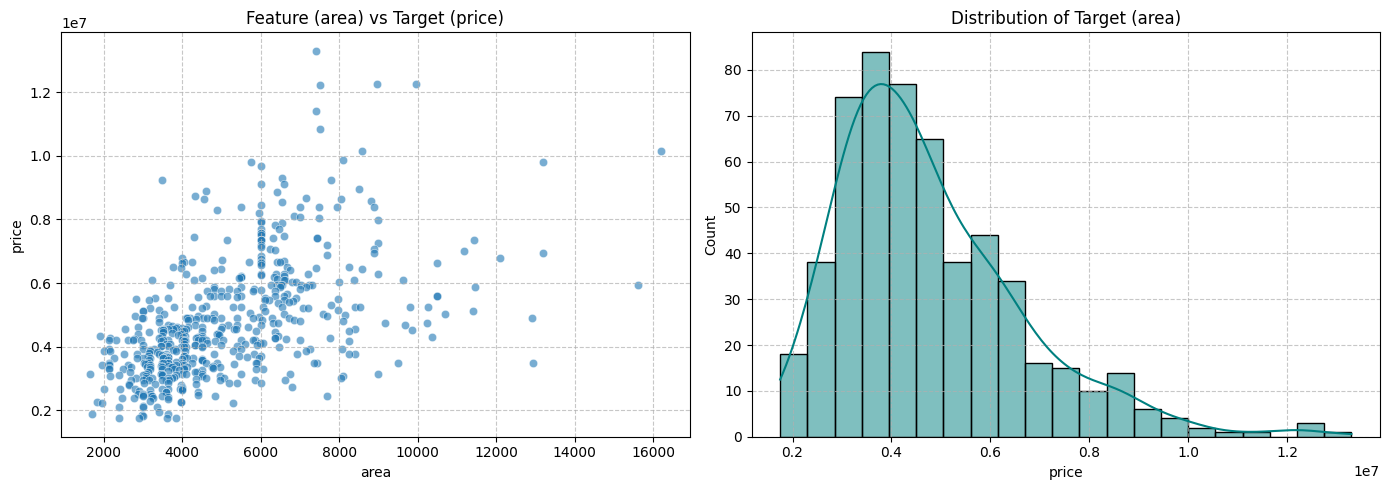

Pearson Correlation Coefficient: 0.5360


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Check features
print("\nDataset Information:")
df.info()

print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display summary statistics
print("Summary Statistics:")
print(df.describe())

# Visual Exploratory Data Analysis
plt.figure(figsize=(14, 5))

# Plot 1: Scatter plot to check linearity
plt.subplot(1, 2, 1)
sns.scatterplot(x='area', y='price', data=df, alpha=0.6)
plt.title('Feature (area) vs Target (price)')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Distribution of the target variable
plt.subplot(1, 2, 2)
sns.histplot(df['price'], kde=True, color='teal')
plt.title('Distribution of Target (area)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Check for correlation
correlation = df.corr(numeric_only=True).iloc[0, 1]
print(f"Pearson Correlation Coefficient: {correlation:.4f}")


**Menghitung least squares (training) - 1D**

In [17]:
try:
    n = x_area.shape[0]
    X = jnp.vstack([jnp.ones(n), x_area]).T
    print(f"X: \n{X}")
    print(f"{X.shape}")

    # compute LS solutions
    beta = jnp.linalg.inv(X.T @ X) @ X.T @ y

    print(f"beta: {beta}, {beta.shape}")
except NameError:
    print("x_area or y not defined. Data reading probably failed.")

X: 
[[1.00e+00 7.42e+03]
 [1.00e+00 8.96e+03]
 [1.00e+00 9.96e+03]
 ...
 [1.00e+00 3.62e+03]
 [1.00e+00 2.91e+03]
 [1.00e+00 3.85e+03]]
(545, 2)
beta: [2.3873002e+06 4.6197650e+02], (2,)


**Menghitung prediksi (inference)**

In [18]:
def linear_predict(X, beta):
    n = X.shape[0]
    ones = jnp.ones((n, 1))
    Xe = jnp.hstack([ones, X])
    y_prime = Xe @ beta

    return y_prime

try:
    X_input = jnp.reshape(x_area, (x_area.shape[0], 1))
    y_prime = linear_predict(X_input, beta)
except NameError:
    print("Variable beta or x_area not defined.")

**Visualisasi data dan prediksi**

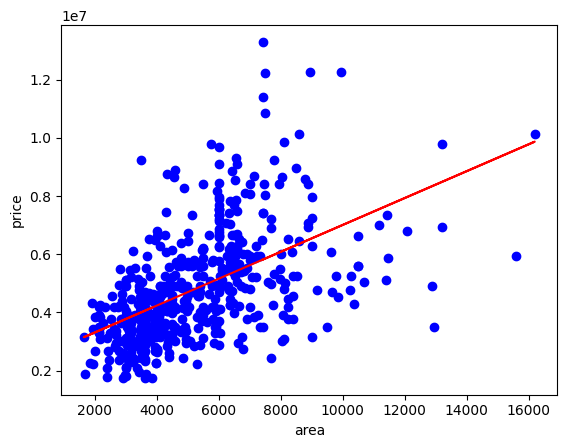

In [19]:
import matplotlib.pyplot as plt
plt.ion()
plt.xlabel("area")
plt.ylabel("price")

try:
    # Plot area vs price
    plt.plot(x_area, y, 'o', color='blue')
    plt.plot(x_area, y_prime, '-', color='red')
    plt.show()
except NameError:
    print("Visualization data not defined.")